# Morfología matemática: Algoritmo de adelgazamiento

El algoritmo de adelgazamiento consiste en el uso de la función: 

### thin(I,J) := I - hit_miss(I,j)

Dónde I corresponde a la imagen original y J el elemento estructurante. Y dónde hit_miss hace referencia a la transformada Hit or Miss...

### Transformada Hit or miss

Consiste en el uso de determinado kernel of elemento estructurante que se pasa sobre la imagen original para determinar si la imagen(Binaria) cumple exactamente con el patrón determinado por el elemento estructurante. Si se cumple para un pixel (i,j) entonces este pixel aparecerá en la imagen resultante. De lo contrario este pixel se eliminará. 




In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Esqueleto

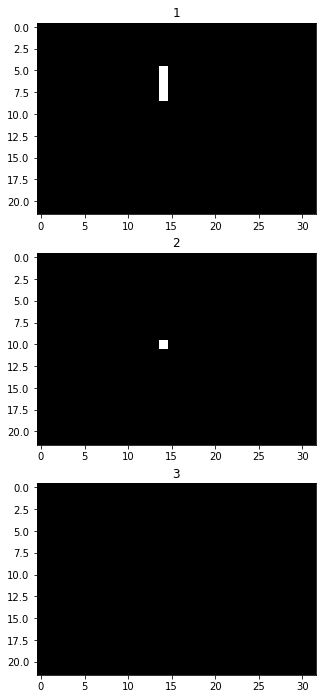

In [76]:
def iteracion_esqueleto(img,kernel,it):
    erocion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel, iterations= it)
    return erocion - cv2.morphologyEx(erocion,cv2.MORPH_OPEN, kernel, iterations= it)

def esqueleto(img,kernel,it):
    ans = np.zeros(img.shape[0:2])
    f, sub = plt.subplots(it,1)
    f.set_size_inches(5, 4*it)
    
    while it > 0:
        aux = iteracion_esqueleto(img,kernel,it)
        ans = ans + aux
        it-=1
        sub[it].imshow(aux,cmap='gray'); sub[it].set_title(str(it+1))

img = cv2.imread('./img2.png',0)
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]], np.uint8)

esqueleto(img,kernel,3)


In [4]:
#Definimos en las variables los elementos estructurantes proporcionados por OpenCV

rect = cv2.MORPH_RECT((3,3), (3,1))
elip = cv2.MORPH_ELLIPSE((3,3), (3,3))
cros = cv2.MORPH_CROSS((3,3), (3,1))



TypeError: 'int' object is not callable